In [ ]:
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

interval = "6h"
BTC_df = pd.read_csv(f"./data/BTC_{interval}.csv")
ETH_df = pd.read_csv(f"./data/ETH_{interval}.csv")
BNB_df = pd.read_csv(f"./data/BNB_{interval}.csv")
XRP_df = pd.read_csv(f"./data/XRP_{interval}.csv")

shared_times = set.intersection(set(BTC_df["open_time"]), (ETH_df["open_time"]), (BNB_df["open_time"]), (XRP_df["open_time"]))

def process_dataframe(df, prefix):
    """Adds a prefix to the column names of a DataFrame."""
    df = df.copy()
    df = df[["open_time", "open", "close", "low", "high"]]
    columns = {col: f"{prefix}_{col}" for col in df.columns if col != "open_time"}
    df.rename(columns=columns, inplace=True)
    df.set_index("open_time", inplace=True)
    return df

BTC_df_processed = process_dataframe(BTC_df, "BTC")
ETH_df_processed = process_dataframe(ETH_df, "ETH")
BNB_df_processed = process_dataframe(BNB_df, "BNB")
XRP_df_processed = process_dataframe(XRP_df, "XRP")

# Concatenate the dataframes side by side, aligning on 'open_time'
merged_df = pd.concat(
    [BTC_df_processed, ETH_df_processed, BNB_df_processed, XRP_df_processed],
    axis=1,
    join="outer",  # Use outer join to keep all 'open_time' values
)

merged_df.head()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
open_time,,,,,,,,,,,,,,,,
2017-08-17 00:00:00,4261.48,4315.32,4261.32,4328.69,301.13,303.10,298.00,303.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,4330.29,4427.30,4287.41,4485.39,302.40,308.95,301.90,312.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 12:00:00,4436.06,4289.24,4235.45,4485.39,308.95,308.33,298.21,312.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 18:00:00,4289.24,4285.08,4200.74,4369.69,308.33,302.00,298.96,311.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-18 00:00:00,4285.08,4313.56,4134.61,4340.62,302.00,304.70,295.19,306.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
shared_df = merged_df.loc[list(shared_times)]

In [3]:
# filling the 2 missing time fata
shared_df.loc['2018-06-26 06:00:00'] = (shared_df.loc['2018-06-26 00:00:00'] + shared_df.loc['2018-06-26 12:00:00'])/2
shared_df.loc['2019-05-15 06:00:00'] = (shared_df.loc['2019-05-15 00:00:00'] + shared_df.loc['2019-05-15 12:00:00'])/2
shared_df = shared_df.sort_index()

In [4]:
merged_df_sorted = merged_df.sort_index()
shared_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10231 entries, 2018-05-04 06:00:00 to 2025-05-04 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   10231 non-null  float64
 1   BTC_close  10231 non-null  float64
 2   BTC_low    10231 non-null  float64
 3   BTC_high   10231 non-null  float64
 4   ETH_open   10231 non-null  float64
 5   ETH_close  10231 non-null  float64
 6   ETH_low    10231 non-null  float64
 7   ETH_high   10231 non-null  float64
 8   BNB_open   10231 non-null  float64
 9   BNB_close  10231 non-null  float64
 10  BNB_low    10231 non-null  float64
 11  BNB_high   10231 non-null  float64
 12  XRP_open   10231 non-null  float64
 13  XRP_close  10231 non-null  float64
 14  XRP_low    10231 non-null  float64
 15  XRP_high   10231 non-null  float64
dtypes: float64(16)
memory usage: 1.3+ MB


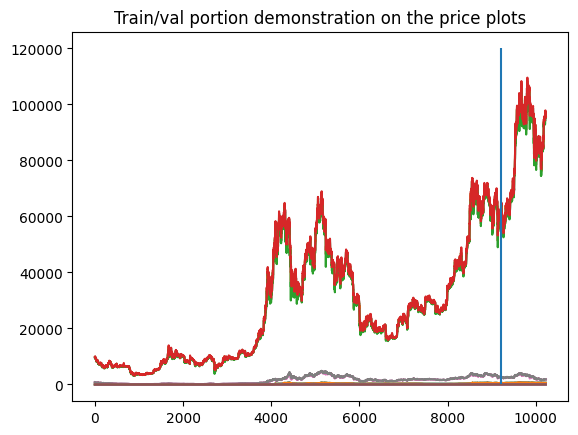

In [5]:
for col in shared_df:
    plt.plot(range(len(shared_df[col])), shared_df[col])
plt.title("Train/val portion demonstration on the price plots")
plt.vlines(len(shared_df) * 0.90, ymin=0, ymax=120000)

# log_z_norm Dataset

In [6]:
shared_df_train = shared_df.iloc[:int(len(shared_df)*0.9)]
shared_df_val = shared_df.iloc[len(shared_df_train):]

In [7]:
shared_df_train_log_norm = np.log10(shared_df_train + 0.00000001)
train_col_means, train_col_stds = shared_df_train_log_norm.mean(), shared_df_train_log_norm.std()
shared_df_train_log_z_norm = (shared_df_train_log_norm - train_col_means) / (train_col_stds + 0.00000001)

shared_df_val_log_norm = np.log10(shared_df_val + 0.00000001)
shared_df_val_log_z_norm = (shared_df_val_log_norm - train_col_means) / (train_col_stds + 0.00000001)

In [8]:
train_col_means_df = pd.DataFrame(train_col_means).T
train_col_means_df

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
0,4.277413,4.277501,4.272051,4.282368,2.929447,2.929504,2.922415,2.935828,1.962543,1.962712,1.955388,1.968923,-0.357867,-0.357857,-0.365927,-0.35055


In [9]:
train_col_stds_df = pd.DataFrame(train_col_stds).T
train_col_stds_df

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
0,0.373547,0.373572,0.373401,0.373643,0.515405,0.515429,0.515699,0.515001,0.673487,0.673472,0.674087,0.672936,0.207892,0.207897,0.206664,0.208972


In [10]:
shared_df_train_log_z_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9207 entries, 2018-05-04 06:00:00 to 2024-08-21 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   9207 non-null   float64
 1   BTC_close  9207 non-null   float64
 2   BTC_low    9207 non-null   float64
 3   BTC_high   9207 non-null   float64
 4   ETH_open   9207 non-null   float64
 5   ETH_close  9207 non-null   float64
 6   ETH_low    9207 non-null   float64
 7   ETH_high   9207 non-null   float64
 8   BNB_open   9207 non-null   float64
 9   BNB_close  9207 non-null   float64
 10  BNB_low    9207 non-null   float64
 11  BNB_high   9207 non-null   float64
 12  XRP_open   9207 non-null   float64
 13  XRP_close  9207 non-null   float64
 14  XRP_low    9207 non-null   float64
 15  XRP_high   9207 non-null   float64
dtypes: float64(16)
memory usage: 1.2+ MB


In [11]:
shared_df_val_log_z_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 2024-08-22 00:00:00 to 2025-05-04 18:00:00
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_open   1024 non-null   float64
 1   BTC_close  1024 non-null   float64
 2   BTC_low    1024 non-null   float64
 3   BTC_high   1024 non-null   float64
 4   ETH_open   1024 non-null   float64
 5   ETH_close  1024 non-null   float64
 6   ETH_low    1024 non-null   float64
 7   ETH_high   1024 non-null   float64
 8   BNB_open   1024 non-null   float64
 9   BNB_close  1024 non-null   float64
 10  BNB_low    1024 non-null   float64
 11  BNB_high   1024 non-null   float64
 12  XRP_open   1024 non-null   float64
 13  XRP_close  1024 non-null   float64
 14  XRP_low    1024 non-null   float64
 15  XRP_high   1024 non-null   float64
dtypes: float64(16)
memory usage: 136.0+ KB


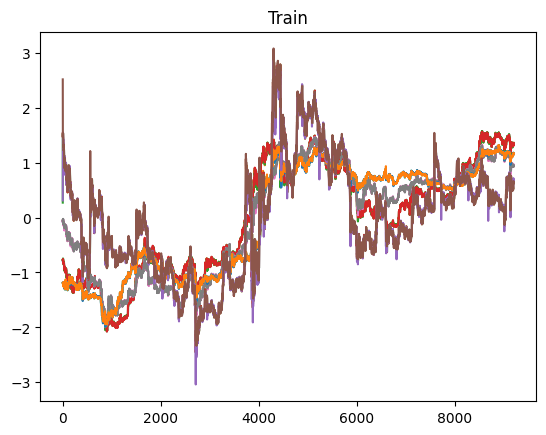

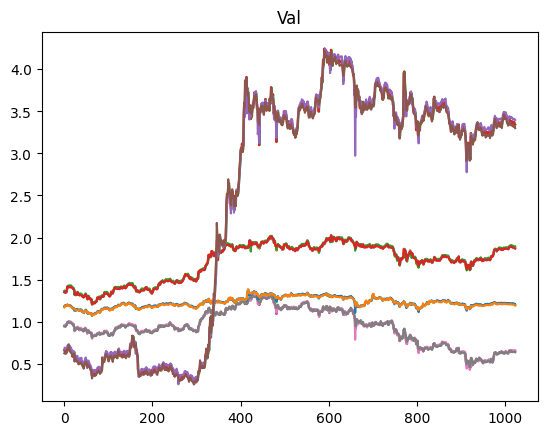

In [12]:
for col in shared_df_train_log_z_norm:
    plt.plot(range(len(shared_df_train_log_z_norm[col])), shared_df_train_log_z_norm[col])
plt.title("Train")
plt.show()

for col in shared_df_val_log_z_norm:
    plt.plot(range(len(shared_df_val_log_z_norm[col])), shared_df_val_log_z_norm[col])
plt.title("Val")
plt.show()

In [13]:
shared_df_train_log_z_norm.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_and_z_norm_train.csv", index=True)
shared_df_val_log_z_norm.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_and_z_norm_val.csv", index=True)
train_col_means_df.to_csv("./data/BTC_ETH_BNB_XRP_6h_z_norm_means.csv", index=False)
train_col_stds_df.to_csv("./data/BTC_ETH_BNB_XRP_6h_z_norm_stds.csv", index=False)

# Relative Price Datasets

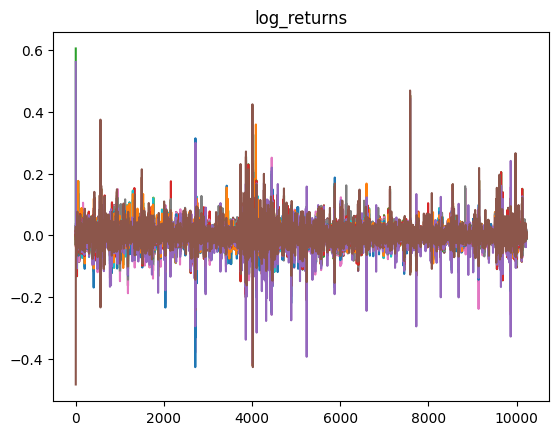

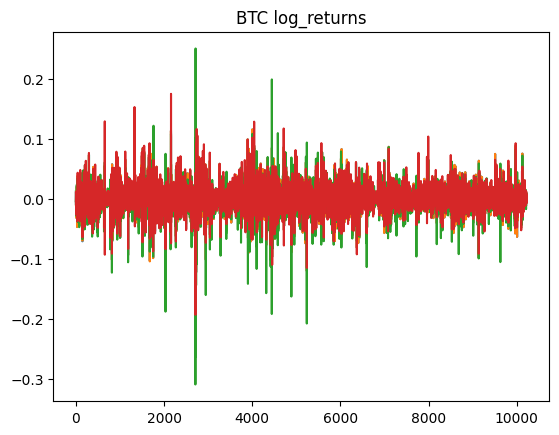

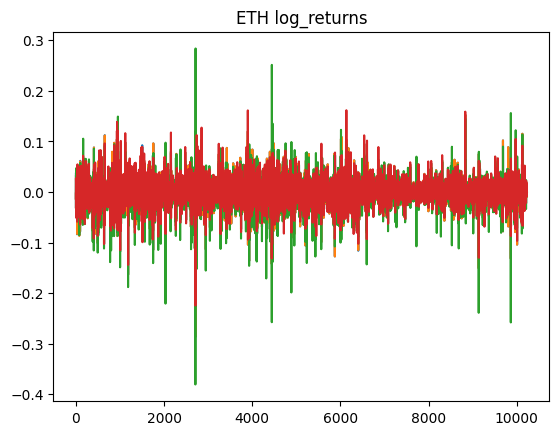

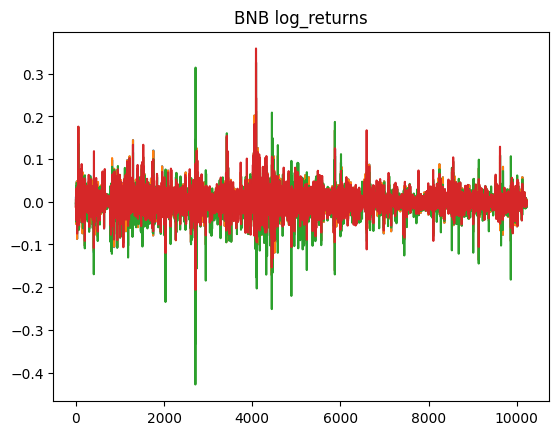

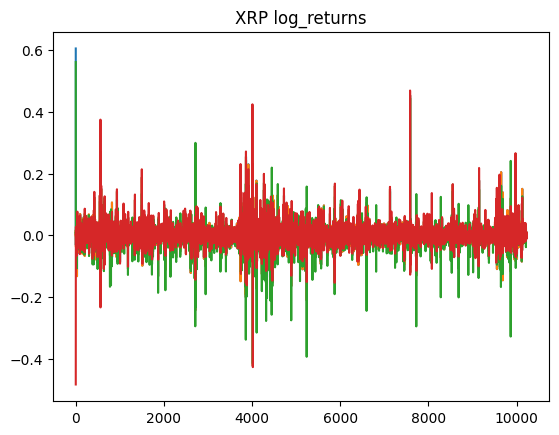

In [6]:
log_returns = np.log(shared_df.shift(-1) / shared_df)
log_returns.dropna(inplace=True)

for col in log_returns:
    plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("log_returns")
plt.show()
for col in log_returns:
    if "BTC" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("BTC log_returns")
plt.show()
for col in log_returns:
    if "ETH" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("ETH log_returns")
plt.show()
for col in log_returns:
    if "BNB" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("BNB log_returns")
plt.show()
for col in log_returns:
    if "XRP" in col:
        plt.plot(range(len(log_returns[col])), log_returns[col])
plt.title("XRP log_returns")
plt.show()

,BTC_open,BTC_close,BTC_low,BTC_high,ETH_open,ETH_close,ETH_low,ETH_high,BNB_open,BNB_close,BNB_low,BNB_high,XRP_open,XRP_close,XRP_low,XRP_high
count,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000,10230.000000
mean,0.000224,0.000223,0.000224,0.000222,0.000084,0.000081,0.000084,0.000080,0.000362,0.000362,0.000363,0.000360,0.000144,0.000084,0.000143,0.000037
std,0.016671,0.016670,0.017873,0.015547,0.021558,0.021537,0.023416,0.019155,0.022142,0.022137,0.023471,0.019919,0.027133,0.026469,0.029220,0.026254
min,-0.241832,-0.242065,-0.308809,-0.192944,-0.286894,-0.285648,-0.380772,-0.224767,-0.298550,-0.299660,-0.427785,-0.206330,-0.423492,-0.423492,-0.416333,-0.483967
25%,-0.005656,-0.005650,-0.005754,-0.005607,-0.008280,-0.008249,-0.007701,-0.007615,-0.008131,-0.008113,-0.007168,-0.007407,-0.009259,-0.009274,-0.008075,-0.009181
50%,0.000255,0.000247,0.001280,-0.000663,0.000218,0.000215,0.001617,-0.000965,0.000410,0.000414,0.001415,-0.000561,-0.000071,-0.000042,0.001619,-0.001437
75%,0.006521,0.006504,0.006867,0.005756,0.009118,0.009109,0.009440,0.007634,0.008949,0.008963,0.009268,0.006989,0.009300,0.009322,0.009895,0.007067
max,0.115651,0.115691,0.250339,0.174897,0.152571,0.152571,0.283779,0.161646,0.326178,0.326189,0.314193,0.358971,0.605365,0.453444,0.561260,0.469054


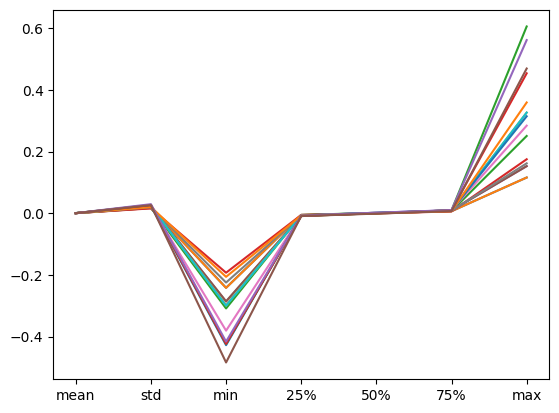

In [7]:
plt.plot(log_returns.describe().iloc[1:])
log_returns.describe()

In [17]:
log_returns_train = log_returns.iloc[:int(len(log_returns)*0.9)]
log_returns_val = log_returns.iloc[len(log_returns_train):]

In [17]:
log_returns_train.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_train.csv", index=True)
log_returns_val.to_csv("./data/BTC_ETH_BNB_XRP_6h_log_returns_val.csv", index=True)